In [8]:
import sys

import matplotlib.pylab as plt
import numpy as np


sys.path.append('/Users/octavia/Dropbox/SVE_v2/GW_model')

infl_modules = ['philips_infl',  'GA_infl']


for mod in infl_modules:
    if mod in sys.modules: 
        del sys.modules[mod]
        

from GA_infl import *
from philips_infl import *


## Green Ampt

In [2]:
psi = -0.1
delta_theta = 0.24
GA_param = {'t_rain': 20*60,     
            'rain': 5/3.6e5,
            'ksatV' : 1/3.6e5,
            'psi': psi,
            'delta_theta': delta_theta}

GA_param['P'] = np.round(np.abs(psi) * delta_theta, 8)
GA_param

{'t_rain': 1200,
 'rain': 1.388888888888889e-05,
 'ksatV': 2.777777777777778e-06,
 'psi': -0.1,
 'delta_theta': 0.24,
 'P': 0.024}

In [3]:
t_pond= GA_t_pond(GA_param)
print ("time of ponding = {0:.0f}".format( t_pond))

res = compute_GA_infl(GA_param)

time of ponding = 432


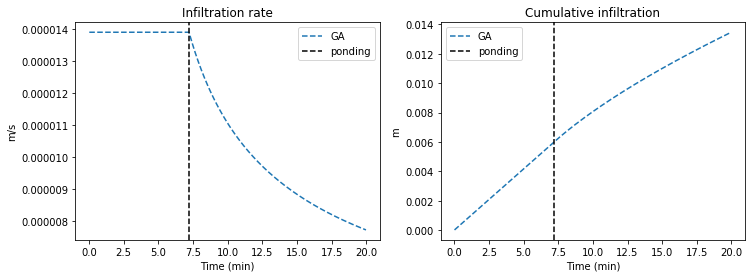

In [4]:


fig, axes = plt.subplots(1, 2, figsize = (12, 4))
ax = axes[0]

ax.plot(res["t"]/60., res["f"], '--', label = "GA")

ax.set_xlabel("Time (min)")
ax.set_ylabel("m/s")
ax.axvline(t_pond/60, c = 'k', ls = '--', label = 'ponding')
ax.legend()
ax.set_title("Infiltration rate")

ax = axes[1]
ax.plot(res["t"]/60., res["F_implicit"], '--', label = "GA")
ax.set_ylabel("m")
ax.set_xlabel("Time (min)")
ax.set_title("Cumulative infiltration")
ax.axvline(t_pond/60, c = 'k', ls = '--', label = 'ponding')
ax.legend()

# Philips equation

In [5]:
t_rain = 20*60     
rain = 5/3.6e5
ksatV  = 2/3.6e5
Ao = 1e-4

phil_param = {'t_rain': t_rain,    
            'rain': rain,
            'ksatV' : ksatV,
            'Ao': Ao}


t_pond = Ao ** 2 * (rain - ksatV / 2.) / 2. / rain / (rain - ksatV) ** 2
phil_param['t_pond'] = t_pond


In [6]:
t_pond = GA_t_pond(GA_param)
print ("time of ponding = {0:.0f}".format( t_pond))

res = compute_GA_infl(GA_param)

time of ponding = 432


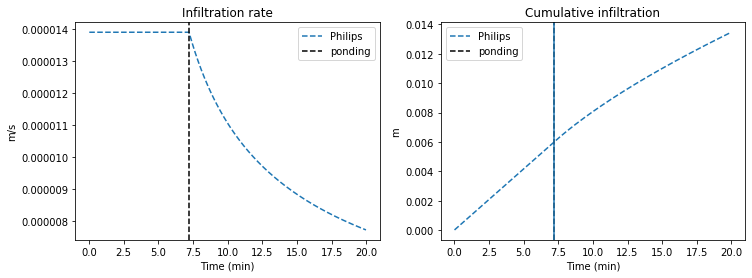

In [7]:


fig, axes = plt.subplots(1, 2, figsize = (12, 4))
ax = axes[0]

ax.plot(res["t"]/60., res["f"], '--', label = "Philips")
ax.set_xlabel("Time (min)")
ax.set_ylabel("m/s")
ax.axvline(t_pond/60, c = 'k', ls = '--', label = 'ponding')
ax.set_title("Infiltration rate")
ax.legend()

ax = axes[1]

ax.plot(res["t"]/60., res["F"], '--', label = "Philips")
ax.axvline(t_pond/60, c = 'k', ls = '--', label = 'ponding')
ax.legend()
ax.set_ylabel("m")
ax.set_xlabel("Time (min)")
ax.set_title("Cumulative infiltration")
ax.axvline(t_pond/60)
